In [3]:
import pandas as pd

df=pd.read_csv('model.csv')
df

,State Name,District Name,modal_price,Year,Category
0,Tamil Nadu,Coimbatore,10500.0,2023,Planation crops
1,Tamil Nadu,Coimbatore,8200.0,2023,Planation crops
2,Tamil Nadu,Coimbatore,8200.0,2023,Planation crops
3,Tamil Nadu,Coimbatore,9000.0,2023,Planation crops
4,Tamil Nadu,Coimbatore,10000.0,2023,Planation crops
...,...,...,...,...,...
1795788,Karnataka,Udupi,1500.0,2020,Vegetables
1795789,Karnataka,Udupi,1800.0,2020,Vegetables
1795790,Karnataka,Udupi,1800.0,2020,Vegetables
1795791,Karnataka,Mandya,23000.0,2022,Others


C:\Users\dayana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dayana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dayana\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\dayana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dayana\anaconda3\Lib\site-packages\statsmodels

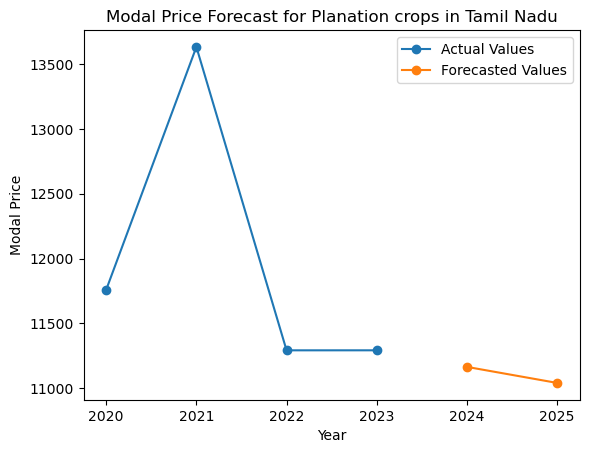

In [9]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

df = pd.read_csv("model.csv")  

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

def generate_forecast():
    selected_state = state_combobox.get()
    selected_category = category_combobox.get()
 
    state_category_data = df[(df['State Name'] == selected_state) & (df['Category'] == selected_category)]
    

    state_category_data_yearly_mean = state_category_data.groupby('Year')['modal_price'].mean()
    
    try:
        # Fit SARIMA model
        model = SARIMAX(state_category_data_yearly_mean, order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))  # SARIMA(1, 0, 0)(1, 0, 0, 12)
        sarima_results = model.fit()

        forecast_steps = 2  # Forecast for 2 years (2024 and 2025)
        forecast = sarima_results.forecast(steps=forecast_steps)
        
    
        fig, ax = plt.subplots()
        ax.plot(state_category_data_yearly_mean.index, state_category_data_yearly_mean.values, label='Actual Values', marker='o')
        ax.plot([2024, 2025], forecast, marker='o', linestyle='-', label='Forecasted Values')
        ax.set_xlabel('Year')
        ax.set_ylabel('Modal Price')
        ax.set_title(f'Modal Price Forecast for {selected_category} in {selected_state}')
        ax.legend()
        
        canvas = FigureCanvasTkAgg(fig, master=frame)
        canvas.draw()
        canvas.get_tk_widget().grid(column=0, row=3, columnspan=2, padx=5, pady=5)
    
    except Exception as e:
      
        print("An error occurred:", e)

# Create GUI window
root = tk.Tk()
root.title("Modal Price Forecast")


window_width = 400
window_height = 300


screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()

x = (screen_width / 2) - (window_width / 2)
y = (screen_height / 2) - (window_height / 2)


root.geometry('%dx%d+%d+%d' % (window_width, window_height, x, y))

# Create a frame
frame = ttk.Frame(root)
frame.place(relx=0.5, rely=0.5, anchor=tk.CENTER)

state_label = ttk.Label(frame, text="Select State:")
state_label.grid(column=0, row=0, padx=5, pady=5)


states = ['Tamil Nadu', 'Kerala', 'Karnataka']  
state_combobox = ttk.Combobox(frame, values=states, state="readonly", width=20)
state_combobox.grid(column=1, row=0, padx=5, pady=5)
state_combobox.current(0)


category_label = ttk.Label(frame, text="Select Category:")
category_label.grid(column=0, row=1, padx=5, pady=5)

category_combobox = ttk.Combobox(frame, values=categories, state="readonly", width=20)
category_combobox.grid(column=1, row=1, padx=5, pady=5)
category_combobox.current(0)


forecast_button = ttk.Button(frame, text="Generate Forecast", command=generate_forecast)
forecast_button.grid(column=0, row=2, columnspan=2, padx=5, pady=5)


root.mainloop()


C:\Users\dayana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dayana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dayana\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\dayana\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dayana\anaconda3\Lib\site-packages\statsmodels

An error occurred: Schur decomposition solver error.


C:\Users\dayana\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\dayana\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\dayana\anaconda3\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\dayana\anaconda3\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\dayana\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seaso

An error occurred: Schur decomposition solver error.


C:\Users\dayana\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\dayana\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\dayana\anaconda3\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\dayana\anaconda3\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\dayana\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seaso

An error occurred: Schur decomposition solver error.


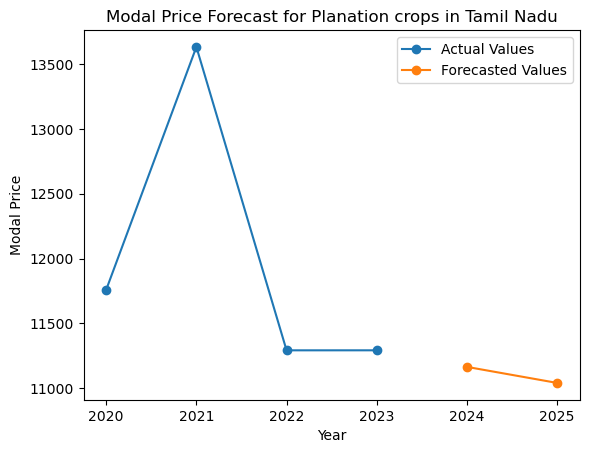

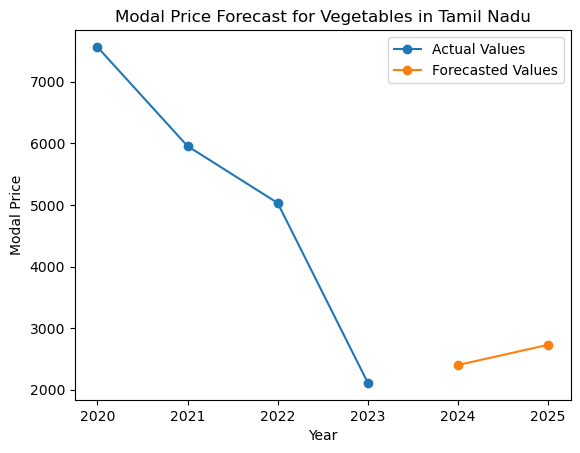

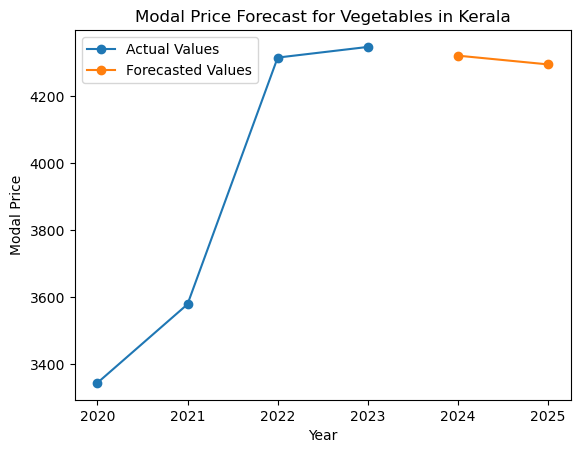

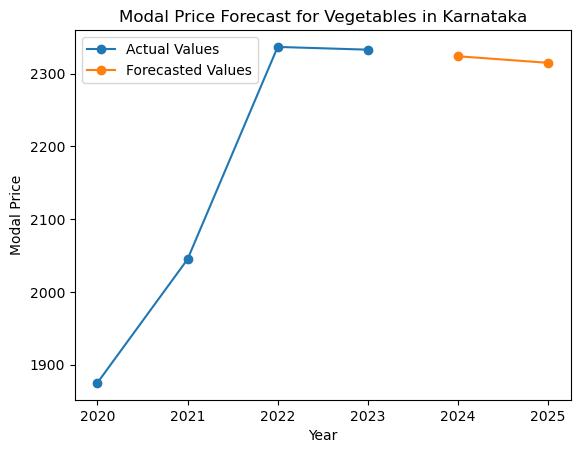

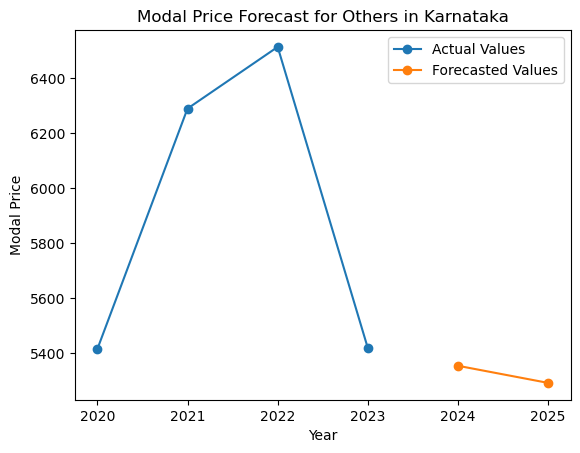

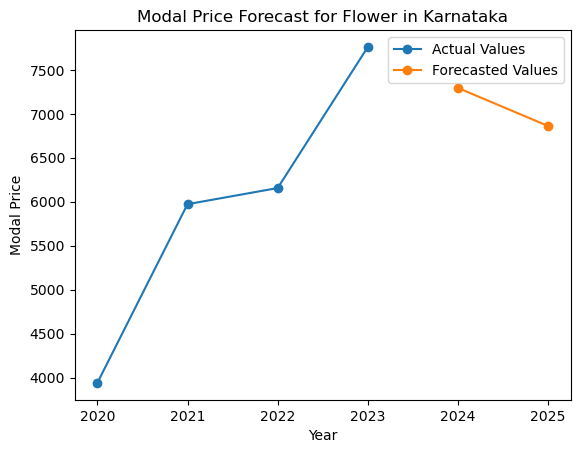

In [10]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

df = pd.read_csv("model.csv")  

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Define categories
categories = ['Planation crops', 'Grains', 'Cereals and Pulses', 'Fruits',
              'Vegetables', 'Spices', 'Nuts and Oilseeds', 'Others',
              'Livestock and Animal Products', 'Flower']

def generate_forecast():
    selected_state = state_combobox.get()
    selected_category = category_combobox.get()
 
    state_category_data = df[(df['State Name'] == selected_state) & (df['Category'] == selected_category)]
    

    state_category_data_yearly_mean = state_category_data.groupby('Year')['modal_price'].mean()
    
    try:
        # Fit SARIMA model
        model = SARIMAX(state_category_data_yearly_mean, order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))  # SARIMA(1, 0, 0)(1, 0, 0, 12)
        sarima_results = model.fit()

        forecast_steps = 2  # Forecast for 2 years (2024 and 2025)
        forecast = sarima_results.forecast(steps=forecast_steps)
        
    
        fig, ax = plt.subplots()
        ax.plot(state_category_data_yearly_mean.index, state_category_data_yearly_mean.values, label='Actual Values', marker='o')
        ax.plot([2024, 2025], forecast, marker='o', linestyle='-', label='Forecasted Values')
        ax.set_xlabel('Year')
        ax.set_ylabel('Modal Price')
        ax.set_title(f'Modal Price Forecast for {selected_category} in {selected_state}')
        ax.legend()
        
        canvas = FigureCanvasTkAgg(fig, master=frame)
        canvas.draw()
        canvas.get_tk_widget().grid(column=0, row=3, columnspan=2, padx=5, pady=5)
    
    except Exception as e:
      
        print("An error occurred:", e)

# Create GUI window
root = tk.Tk()
root.title("Modal Price Forecast")


window_width = 400
window_height = 300


screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()

x = (screen_width / 2) - (window_width / 2)
y = (screen_height / 2) - (window_height / 2)


root.geometry('%dx%d+%d+%d' % (window_width, window_height, x, y))

# Create a frame
frame = ttk.Frame(root)
frame.place(relx=0.5, rely=0.5, anchor=tk.CENTER)

state_label = ttk.Label(frame, text="Select State:")
state_label.grid(column=0, row=0, padx=5, pady=5)


states = ['Tamil Nadu', 'Kerala', 'Karnataka']  
state_combobox = ttk.Combobox(frame, values=states, state="readonly", width=20)
state_combobox.grid(column=1, row=0, padx=5, pady=5)
state_combobox.current(0)


category_label = ttk.Label(frame, text="Select Category:")
category_label.grid(column=0, row=1, padx=5, pady=5)

category_combobox = ttk.Combobox(frame, values=categories, state="readonly", width=20)
category_combobox.grid(column=1, row=1, padx=5, pady=5)
category_combobox.current(0)


forecast_button = ttk.Button(frame, text="Generate Forecast", command=generate_forecast)
forecast_button.grid(column=0, row=2, columnspan=2, padx=5, pady=5)


root.mainloop()
